In [209]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, auc, average_precision_score
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.ensemble import RandomForestClassifier

### Load Dataset
- Binary classification data (breat cancer data)
- Calibrate the class ratio to make it a bit more unbalanced; this step can be negelected or modified

In [180]:
data = datasets.load_breast_cancer()

In [181]:
X_data = data.data
y_data = data.target    

In [182]:
# original data has 212 '0' (malignant) and 357 '1' (benign) class labels
counts = Counter(y_data)
print(counts)     

Counter({1: 357, 0: 212})


In [183]:
y_data = y_data.reshape((y_data.shape[0], 1))

In [185]:
data_merged = np.concatenate((X_data, y_data), axis = 1)

In [187]:
data_merged = data_merged[data_merged[:, -1].argsort()]

In [227]:
imbal_data = data_merged[50:]

In [228]:
X_data = imbal_data[:, :-1]
y_data = imbal_data[:, -1]

In [229]:
# now, we have a slightly more unbalanced dataset of about 2:1
counts = Counter(y_data)
print(counts)    

Counter({1.0: 357, 0.0: 162})


In [231]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 7)    # split data into train & test set

### Create model
- Create a classification model
- Verify its overall performance (rand accuracy, precision, recall, f1-score, etc.)

In [232]:
clf = RandomForestClassifier() 
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [233]:
y_pred = clf.predict(X_test)

In [234]:
print(accuracy_score(y_test, y_pred))    # 92.9% of rand accuracy

0.929487179487


In [236]:
print(y_pred)
print(y_test)

[ 0.  0.  0.  1.  0.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  0.  1.  0.  1.  1.  1.  1.  1.  0.  1.  0.  1.  1.  0.  1.  1.  1.
  1.  1.  0.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.
  1.  0.  1.  1.  1.  1.  1.  0.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  0.  1.  1.  1.  0.  1.  0.  1.  1.  1.  1.  0.  1.  1.  1.  1.
  0.  1.  0.  1.  0.  1.  0.  1.  1.  0.  0.  1.  0.  1.  1.  1.  0.  1.
  0.  0.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  0.  1.  1.  0.
  1.  1.  0.  1.  1.  1.  1.  0.  1.  0.  1.  0.  0.  1.  0.  1.  0.  0.
  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  0.  0.]
[ 1.  0.  0.  1.  0.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  0.  1.  0.  1.  1.  1.  1.  1.  0.  1.  0.  1.  1.  0.  1.  1.  1.
  1.  1.  0.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.  1.  0.  1.  0.  1.
  1.  0.  1.  1.  0.  1.  1.  0.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  0.  1.  1.  1.  0.  1.  0.  1.  1.  1.  1.  0.  1.  1.  1.  1.
 

In [237]:
confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)    # show confusion matrix

[[ 40   6]
 [  5 105]]


In [238]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.89      0.87      0.88        46
        1.0       0.95      0.95      0.95       110

avg / total       0.93      0.93      0.93       156



### 1. ROC curve
- Create ROC curve and calculate ROC_AUC score

In [239]:
y_score = clf.predict_proba(X_test)    # predict probabilities of each data instance to calculate the ROC curve

In [240]:
y_score = np.array(y_score[:, -1], dtype = np.float32)

In [253]:
print(y_score)

[ 0.5         0.30000001  0.          1.          0.1         1.          1.
  1.          1.          0.1         1.          1.          1.          1.
  1.          1.          0.89999998  0.89999998  1.          0.
  0.80000001  0.          1.          1.          1.          1.          1.
  0.          1.          0.          1.          1.          0.          1.
  0.89999998  1.          1.          1.          0.          1.          1.
  0.1         0.          0.89999998  1.          0.89999998  1.          1.
  1.          1.          0.80000001  1.          0.          1.          1.
  0.          1.          1.          0.60000002  1.          0.89999998
  0.          1.          0.80000001  0.1         1.          1.          1.
  1.          1.          1.          1.          1.          1.          0.
  1.          0.69999999  1.          0.          1.          0.          1.
  1.          1.          1.          0.          1.          1.          1.
  0.60000002  0

In [242]:
print(roc_auc_score(y_test, y_score))

0.985079051383


In [243]:
fpr, tpr, _ = roc_curve(y_test, y_score)

C:\Users\Buomsoo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


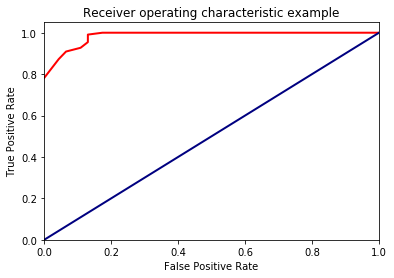

In [244]:
plt.plot(fpr, tpr, color= 'red', lw = 2)
plt.plot([0, 1], [0, 1], color='navy', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### 2. Bookmaker's Informedness
- Calculate bookmaker's informedness & markedness
- Definition (Powers 2011)
    - "Informedness quantifies how informed a predictor is for the specified condition, and specifies the probability that a prediction is informed in relation to the condition (versus chance)"
    - "Markedness quantifies how marked a condition is for the specified predictor, and specifies the probability that a condition is marked by the predictor (versus chance)"

In [247]:
tn, fp, fn, tp = confusion_mat.ravel()

In [248]:
print(tn, fp, fn, tp)

40 6 5 105


In [249]:
recall = tp / (tp + fn)
inverse_recall = tn / (fp + tn)
precision = tp / (tp + fp)
inverse_precision = tn / (fn + tn)

In [254]:
informedness = recall + inverse_recall - 1
markedness = precision + inverse_precision - 1

In [256]:
print('Informedness: ', informedness)
print('Markedness: ', markedness)

Informedness:  0.824110671937
Markedness:  0.834834834835
